# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Funções

In [2]:
def weight_first(score, count):
  score += (count*5)
  return score

def weight_second(score, count):
  score += (count*4)
  return score

def weight_third(score, count):
  score += (count*3)
  return score

def weight_fourth(score, count):
  score += (count*2)
  return score

def weight_fifth(score, count):
  score += (count*1)
  return score

# Código

In [3]:
data = [['miranha', 'xismen', 'colin', 'skript copiou', 'shonen de lutinha']]

df = pd.DataFrame(data, columns=['Primeiro', 'Segundo', 'Terceiro', 'Quarto', 'Quinto'])
df

,Primeiro,Segundo,Terceiro,Quarto,Quinto
0,miranha,xismen,colin,skript copiou,shonen de lutinha


In [4]:
#excel_file = 'movies.xls'
#df = pd.read_excel(excel_file)

## Insira seu top 5 aqui!

In [5]:
df.loc[df.shape[0]] = ['colin', 'xismen', 'miranha', 'skript copiou', 'shonen de lutinha']

In [6]:
uniqueValues = (df['Primeiro'].append(df['Segundo'].append(df['Terceiro'].append(df['Quarto'].append(df['Quinto']))))).unique()
print(uniqueValues)

['miranha' 'colin' 'xismen' 'skript copiou' 'shonen de lutinha']


In [7]:
uniqueValues

array(['miranha', 'colin', 'xismen', 'skript copiou', 'shonen de lutinha'],
      dtype=object)

In [8]:
df.apply(pd.Series.value_counts)

,Primeiro,Segundo,Terceiro,Quarto,Quinto
colin,1.0,NaN,1.0,NaN,NaN
miranha,1.0,NaN,1.0,NaN,NaN
shonen de lutinha,NaN,NaN,NaN,NaN,2.0
skript copiou,NaN,NaN,NaN,2.0,NaN
xismen,NaN,2.0,NaN,NaN,NaN


In [9]:
df_results = pd.DataFrame(data=None, columns=['Titulos', 'Score'])

In [10]:
for i in range(len(uniqueValues)):
  df_results.loc[i] = [uniqueValues[i], 0]

In [11]:
df_results

,Titulos,Score
0,miranha,0
1,colin,0
2,xismen,0
3,skript copiou,0
4,shonen de lutinha,0


In [12]:
for i in range(len(uniqueValues)):
  score = 0
  count = 0

  count = np.count_nonzero(df['Primeiro']==uniqueValues[i])
  score = weight_first(score, count)
  df_results.loc[i, 'Score'] = score
  count = 0

  count = np.count_nonzero(df['Segundo']==uniqueValues[i])
  score = weight_second(score, count)
  df_results.loc[i, 'Score'] = score
  count = 0

  count = np.count_nonzero(df['Terceiro']==uniqueValues[i])
  score = weight_third(score, count)
  df_results.loc[i, 'Score'] = score
  count = 0

  count = np.count_nonzero(df['Quarto']==uniqueValues[i])
  score = weight_fourth(score, count)
  df_results.loc[i, 'Score'] = score
  count = 0

  count = np.count_nonzero(df['Quinto']==uniqueValues[i])
  score = weight_fifth(score, count)
  df_results.loc[i, 'Score'] = score

# Gráficos

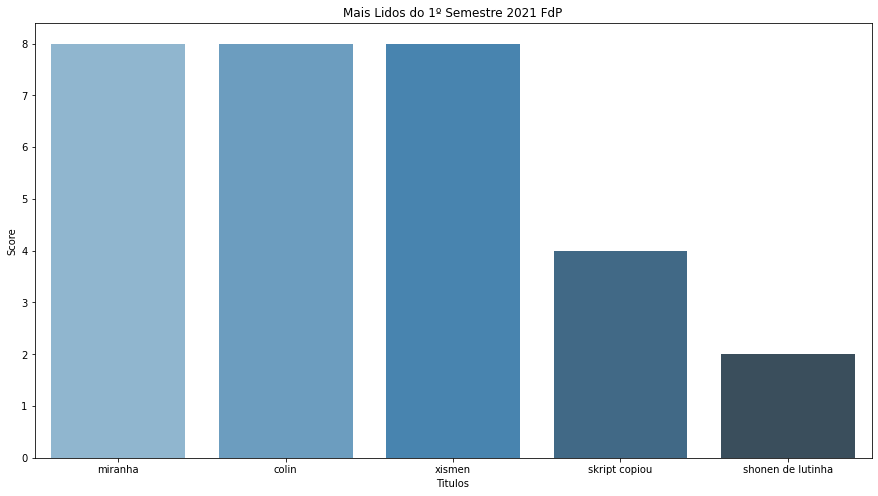

In [13]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Titulos", y="Score", data=df_results, palette="Blues_d", order=df_results.sort_values('Score', ascending=False).Titulos).set_title('Mais Lidos do 1º Semestre 2021 FdP')
plt.show()

In [14]:
df_pie = pd.DataFrame(data=None, columns=['Titulos', 'Occurance'])

In [15]:
for i in range(len(uniqueValues)):
  df_pie.loc[i] = [uniqueValues[i], 0]

In [16]:
for i in range(len(uniqueValues)):
  count = 0

  count += np.count_nonzero(df['Primeiro']==uniqueValues[i])
  count += np.count_nonzero(df['Segundo']==uniqueValues[i])
  count += np.count_nonzero(df['Terceiro']==uniqueValues[i])
  count += np.count_nonzero(df['Quarto']==uniqueValues[i])
  count += np.count_nonzero(df['Quinto']==uniqueValues[i])
  df_pie.loc[i, 'Occurance'] = count

In [17]:
df_pie.set_index('Titulos', inplace=True)

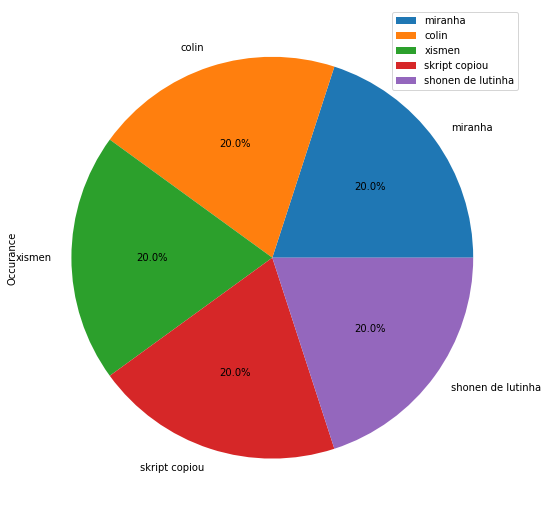

In [18]:
plot = df_pie.plot.pie(y='Occurance', figsize=(9,12), autopct='%1.1f%%')

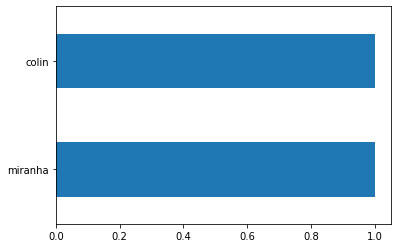

In [19]:
df['Primeiro'].value_counts().sort_values(ascending=False).plot(kind = 'barh').set_title('Ocorrência do Titulo em 1º lugar')

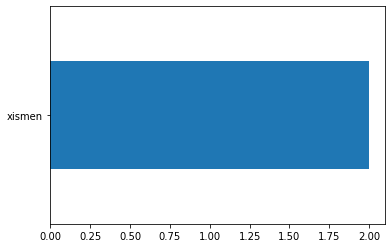

In [20]:
df['Segundo'].value_counts().sort_values(ascending=False).plot(kind = 'barh').set_title('Ocorrência do Titulo em 2º lugar')

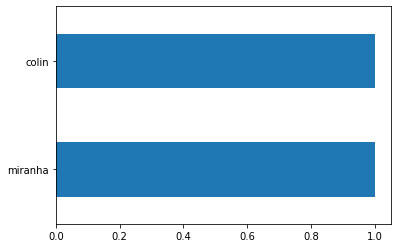

In [21]:
df['Terceiro'].value_counts().sort_values(ascending=False).plot(kind = 'barh').set_title('Ocorrência do Titulo em 3º lugar')

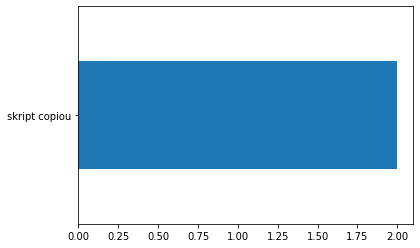

In [22]:
df['Quarto'].value_counts().sort_values(ascending=False).plot(kind = 'barh').set_title('Ocorrência do Titulo em 4º lugar')

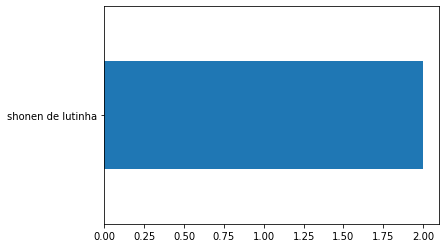

In [23]:
df['Quinto'].value_counts().sort_values(ascending=False).plot(kind = 'barh').set_title('Ocorrência do Titulo em 5º lugar')